In [19]:
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from predict.plot_helper import PlotHelper
from predict.stat_tests import StatTestWrapper
from predict.transformations import TransformHelper
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
CSV_AQI_PATH = '../datasources/aqi_calc/'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}

In [21]:
def get_dataframes_for_pollutant(pollutant_id: int) -> dict[str, pd.DataFrame]:
    directory = os.path.join(CSV_AQI_PATH,  str(pollutant_id))
    df_dict = {}
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=True, index_col='DatetimeEnd')
        df_dict[filename[:filename.index('.')]] = df
    return df_dict

In [22]:
pollutant_id = 10
dfs = get_dataframes_for_pollutant(pollutant_id)

Временные ряды AQI. Период: ALL


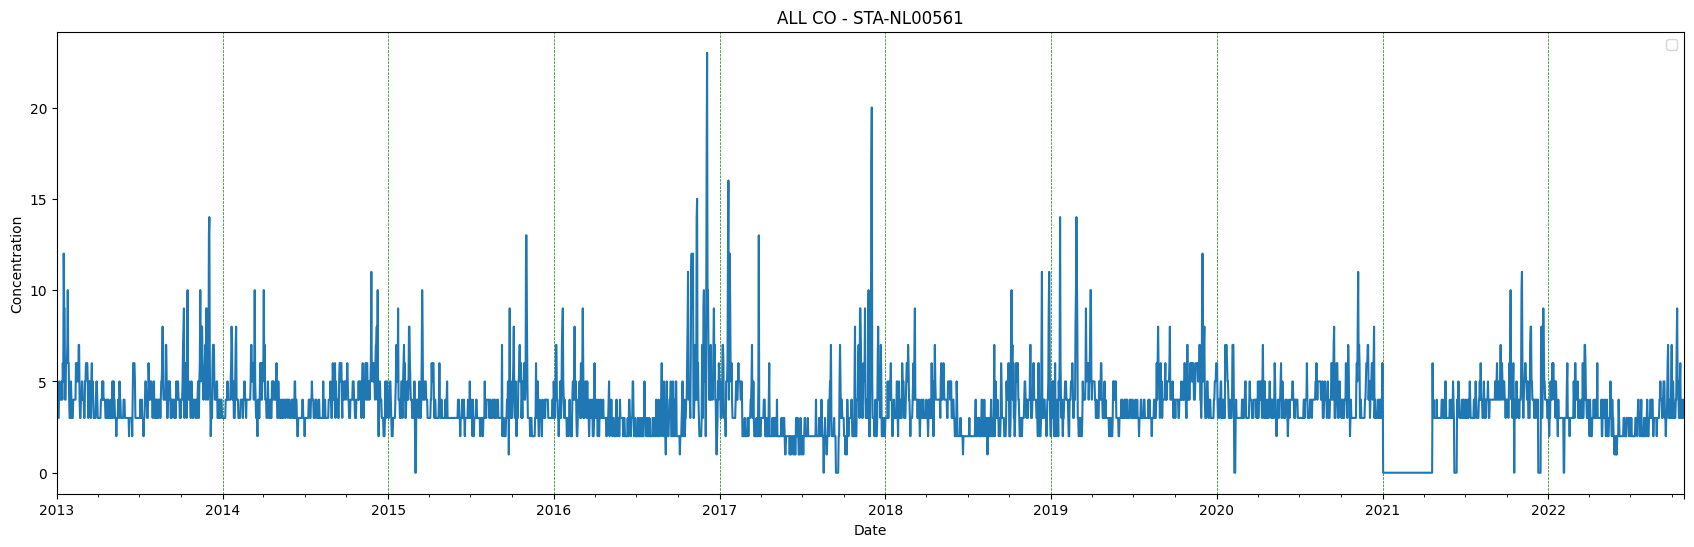

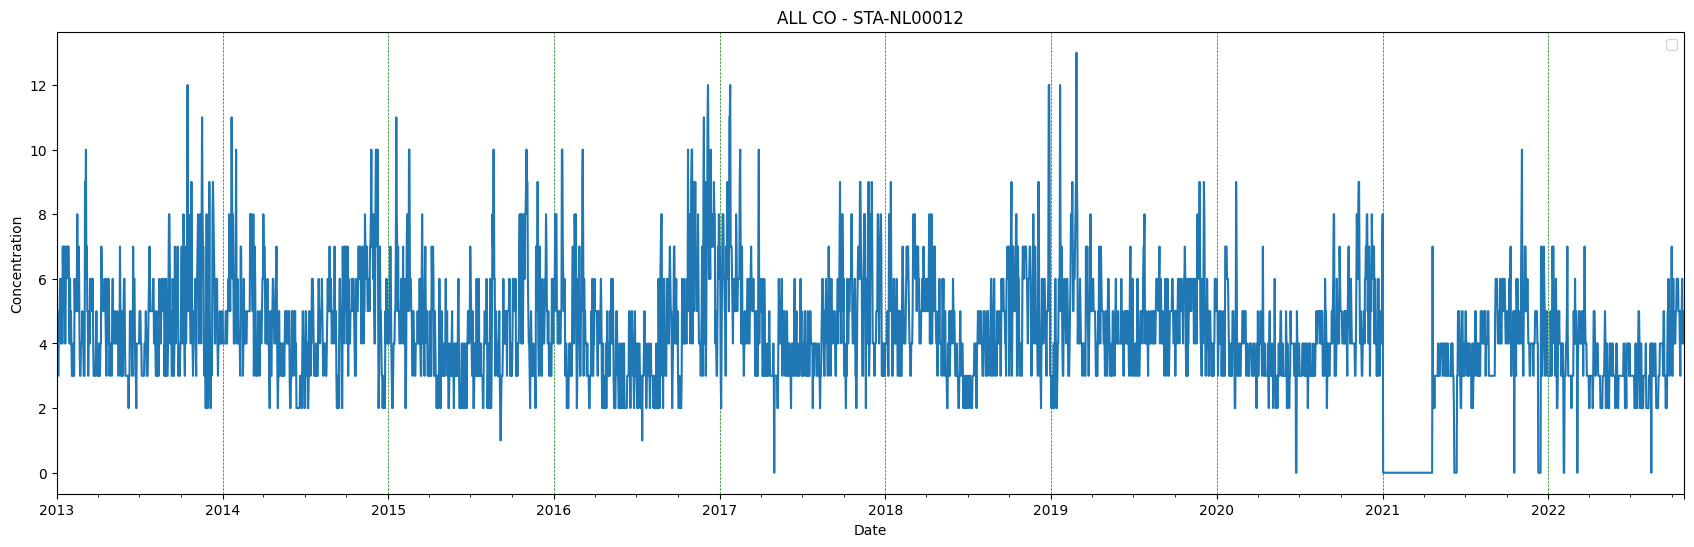

In [23]:
period_name = 'ALL'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: YEAR


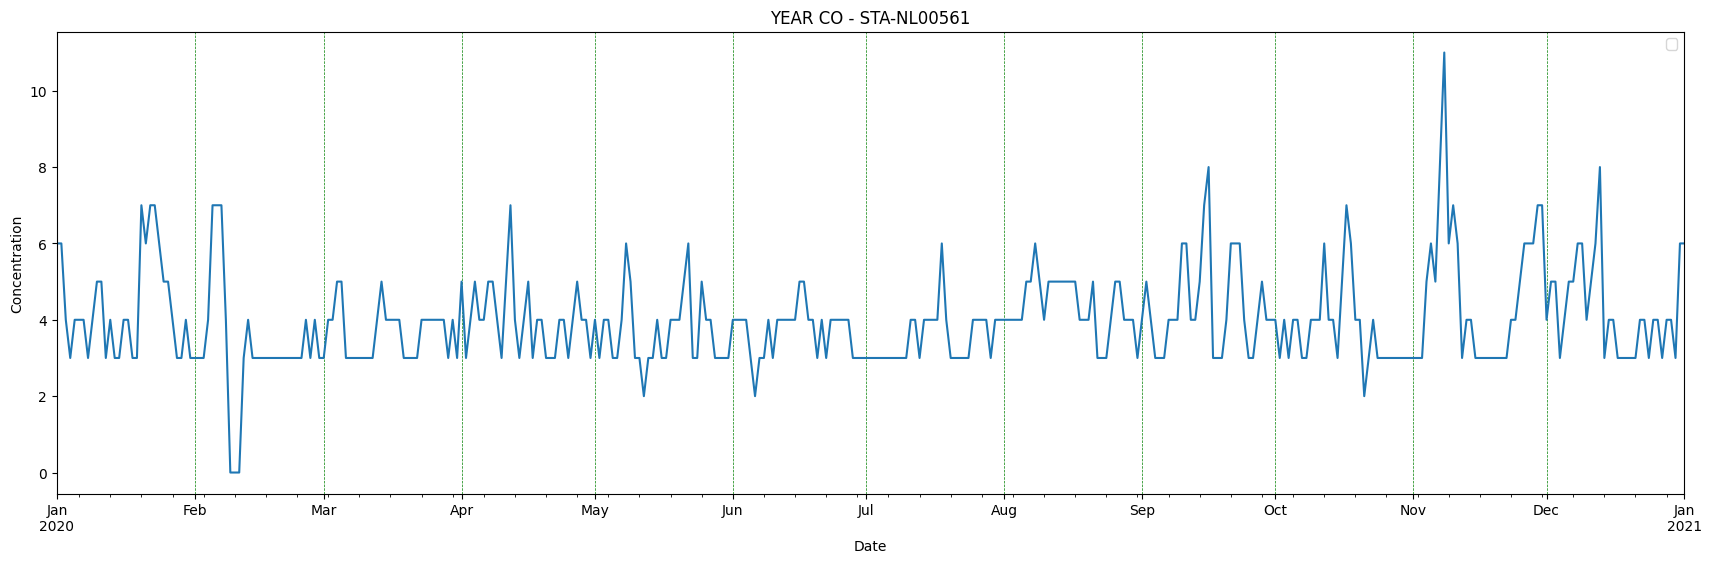

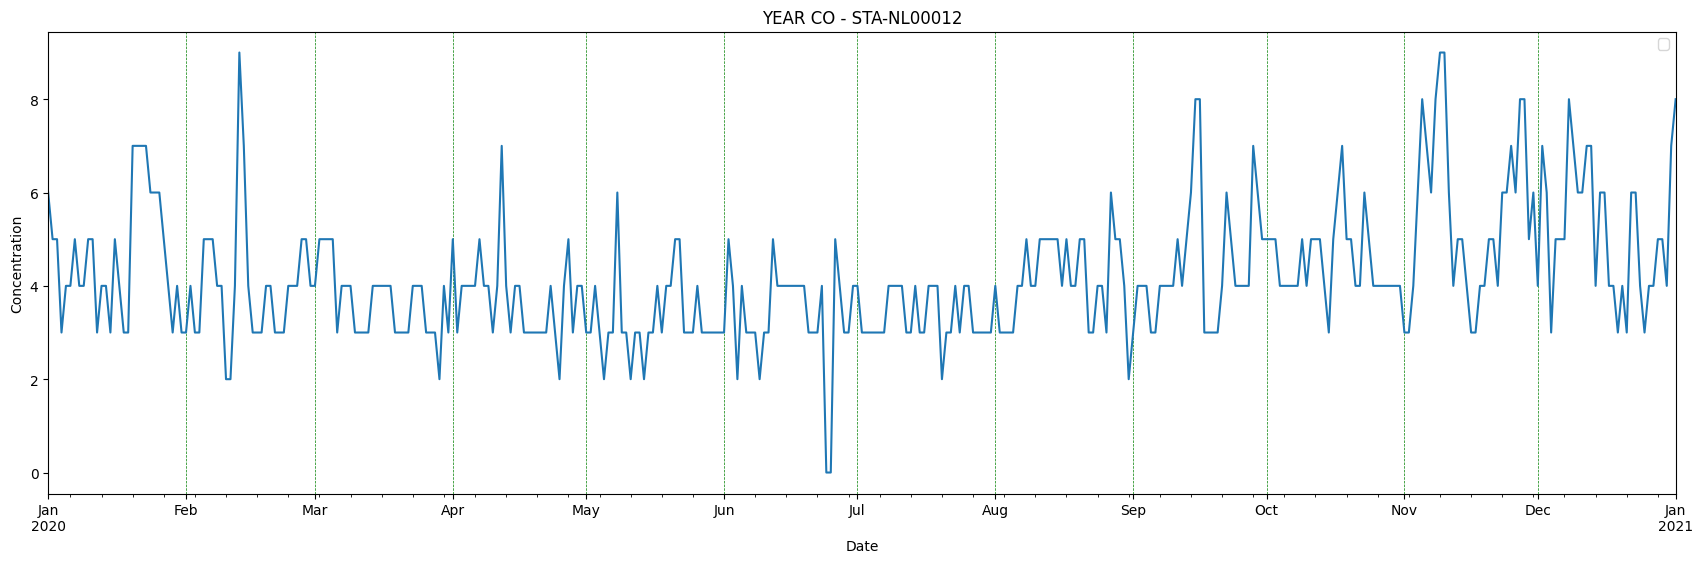

In [24]:
period_name = 'YEAR'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-01-01', date_to='2021-01-01', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: MONTH


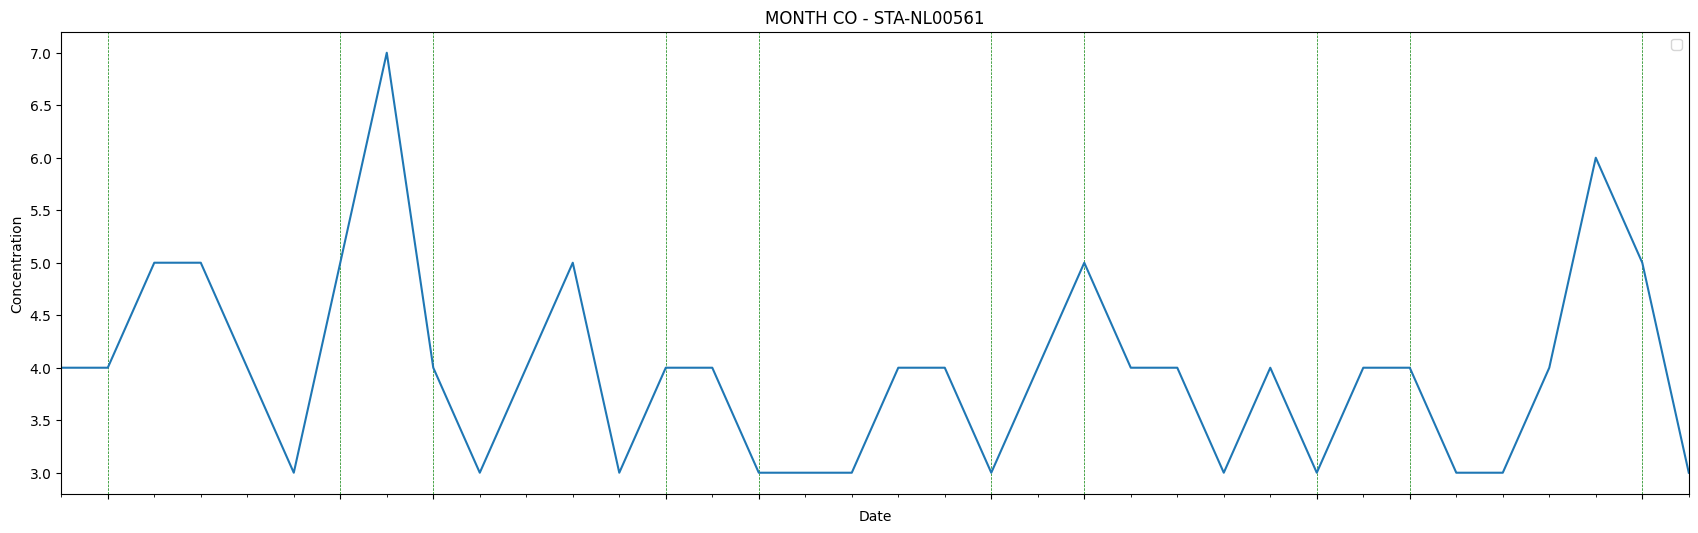

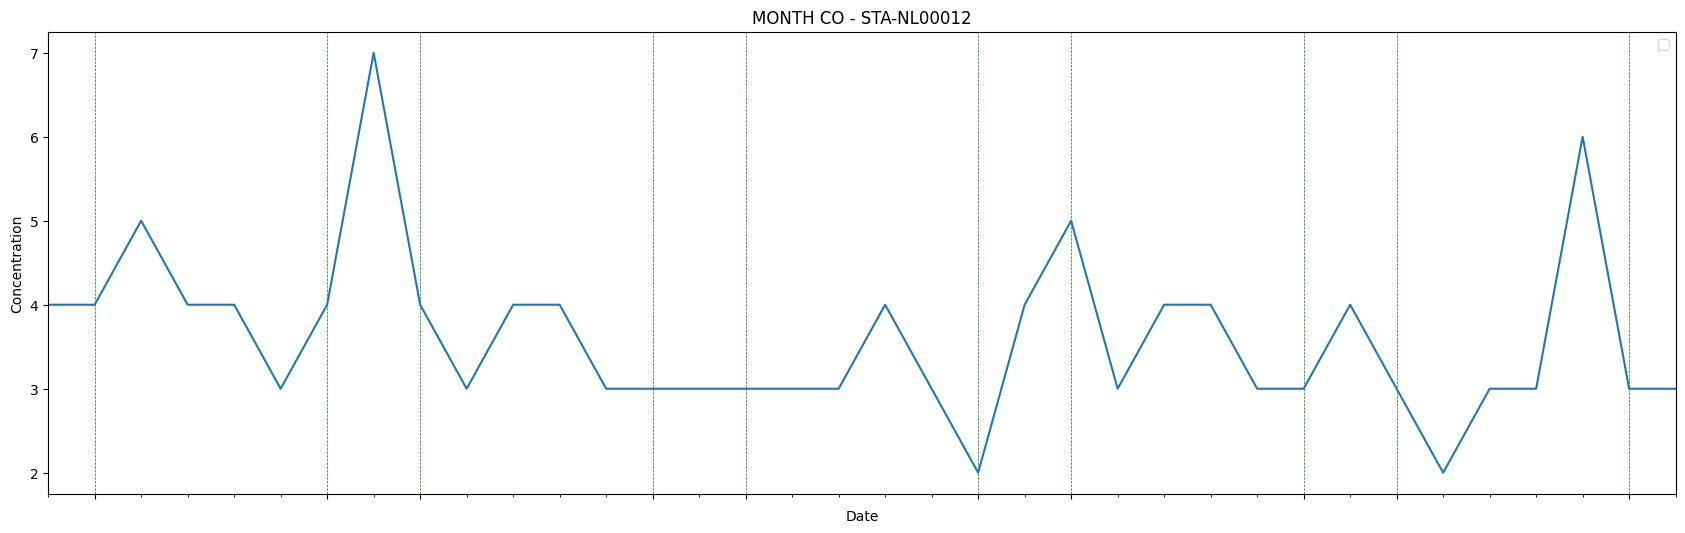

In [25]:
period_name = 'MONTH'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-04-05', date_to='2020-05-10', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}', xticks='w')

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования
-----STA-NL00561-----
ADF Statistic: -5.602525633056001
p-value: 1.2553347595063091e-06
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.671908411082401
p-value: 0.016099235356145367
maximal Lag: 31
Critical Values:
Stationary


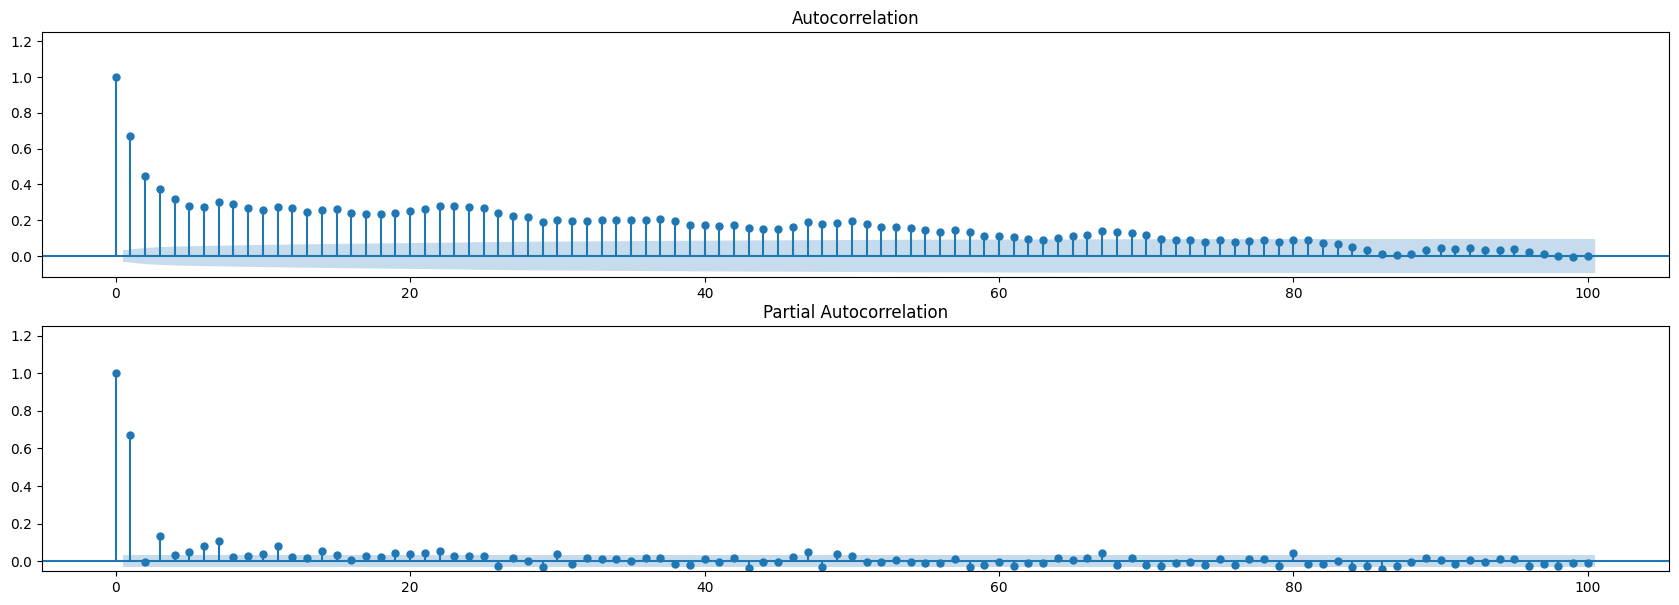

-----STA-NL00012-----
ADF Statistic: -5.504721331154921
p-value: 2.0339883467914373e-06
maximal Lag: 22
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 1.5456085218425297
p-value: 0.01
maximal Lag: 33
Critical Values:
Stationary


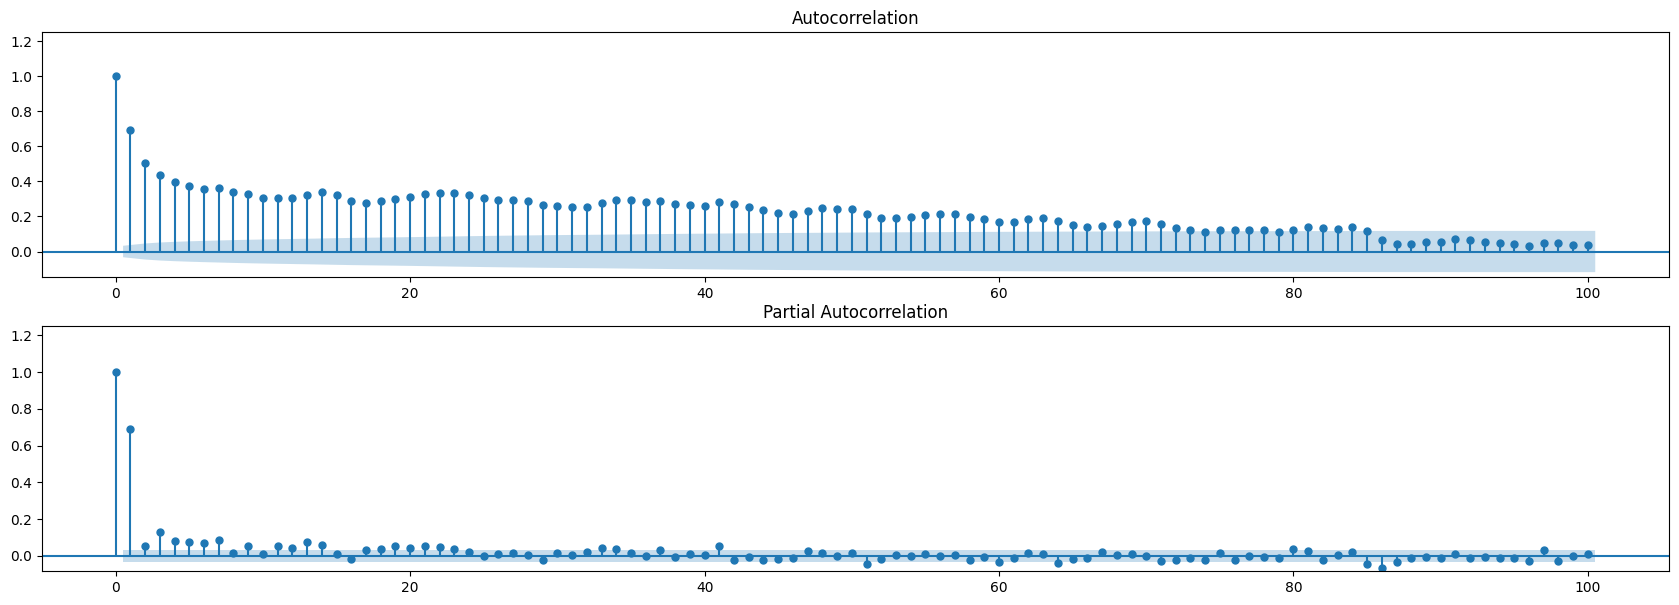

In [26]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году
-----STA-NL00561-----
ADF Statistic: -6.0306515859207375
p-value: 1.4206623671430503e-07
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.15447310817047938
p-value: 0.1
maximal Lag: 28
Critical Values:
Non-stationary


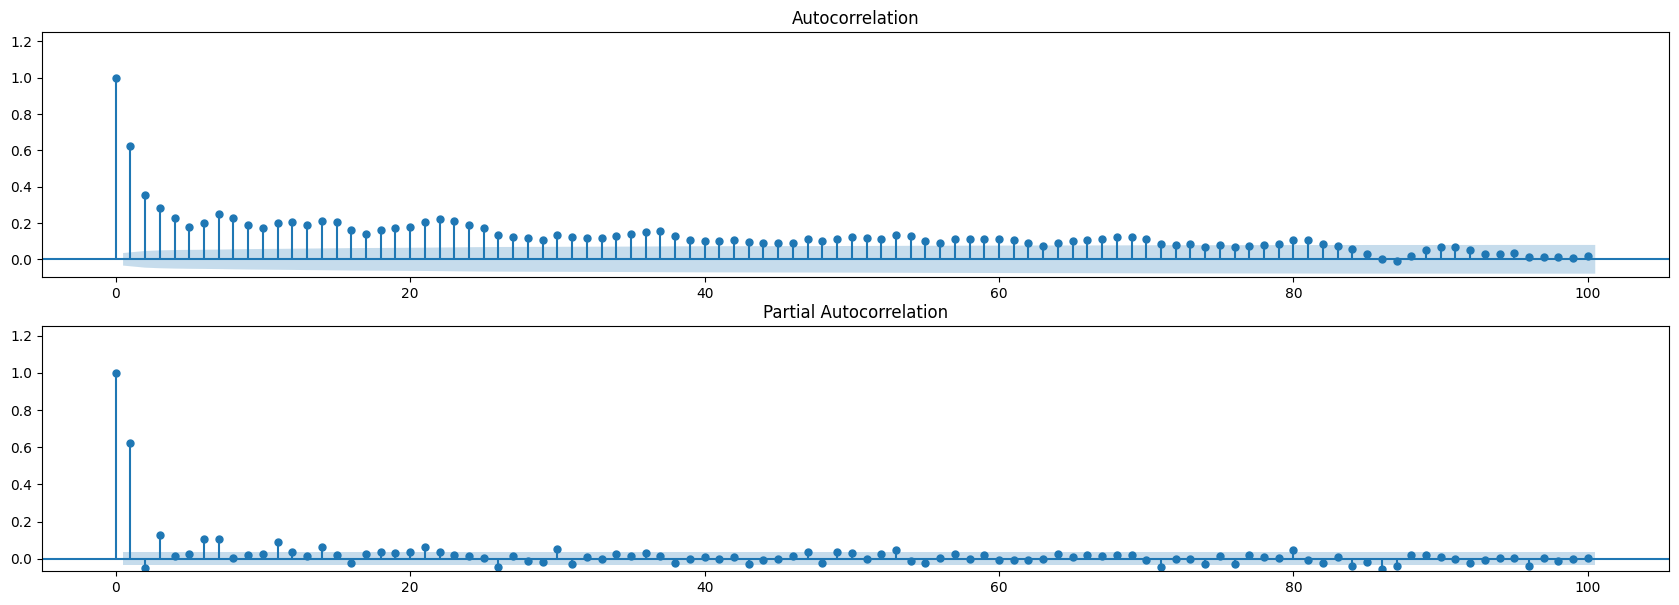

-----STA-NL00012-----
ADF Statistic: -6.765491691698337
p-value: 2.7238944679993434e-09
maximal Lag: 21
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.20798844575224246
p-value: 0.1
maximal Lag: 30
Critical Values:
Non-stationary


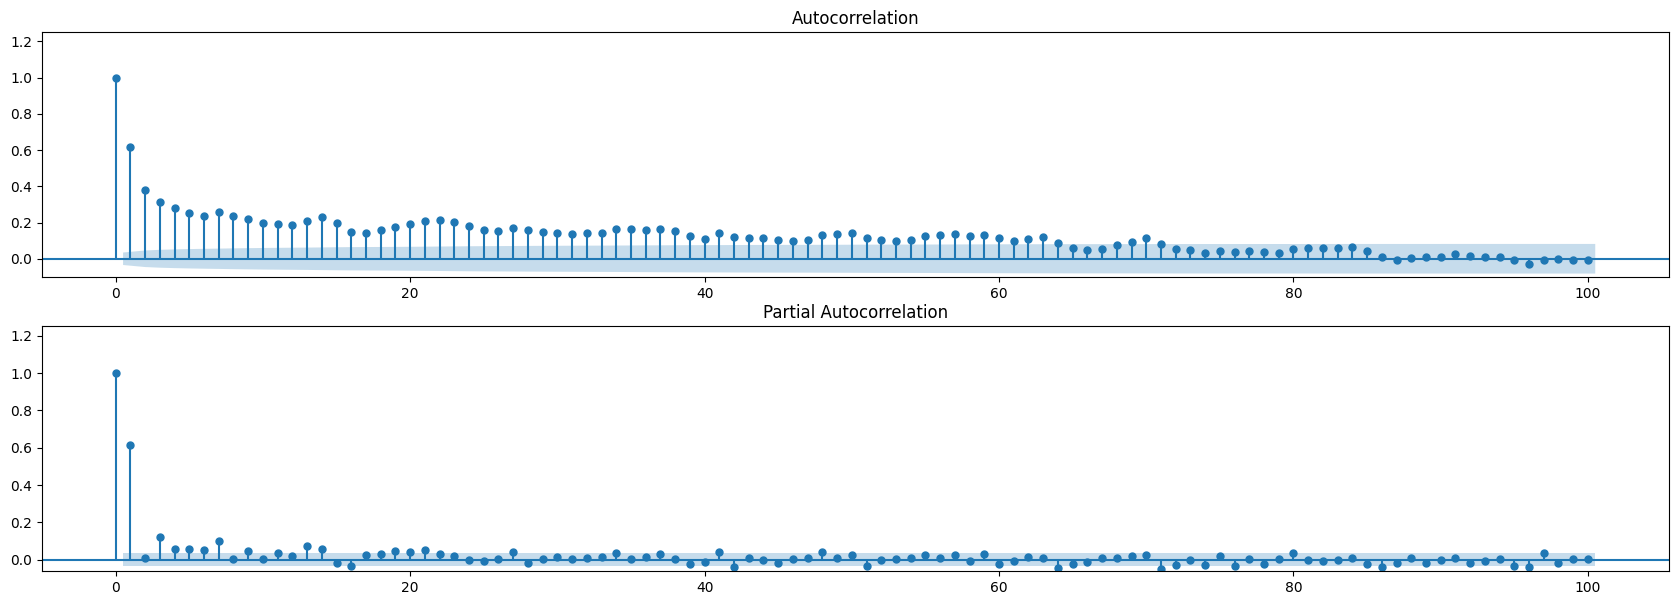

In [27]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k], [('Y', 1)], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе
-----STA-NL00561-----
ADF Statistic: -14.77075053034945
p-value: 2.324544710610726e-27
maximal Lag: 28
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.003867667661999226
p-value: 0.1
maximal Lag: 13
Critical Values:
Non-stationary


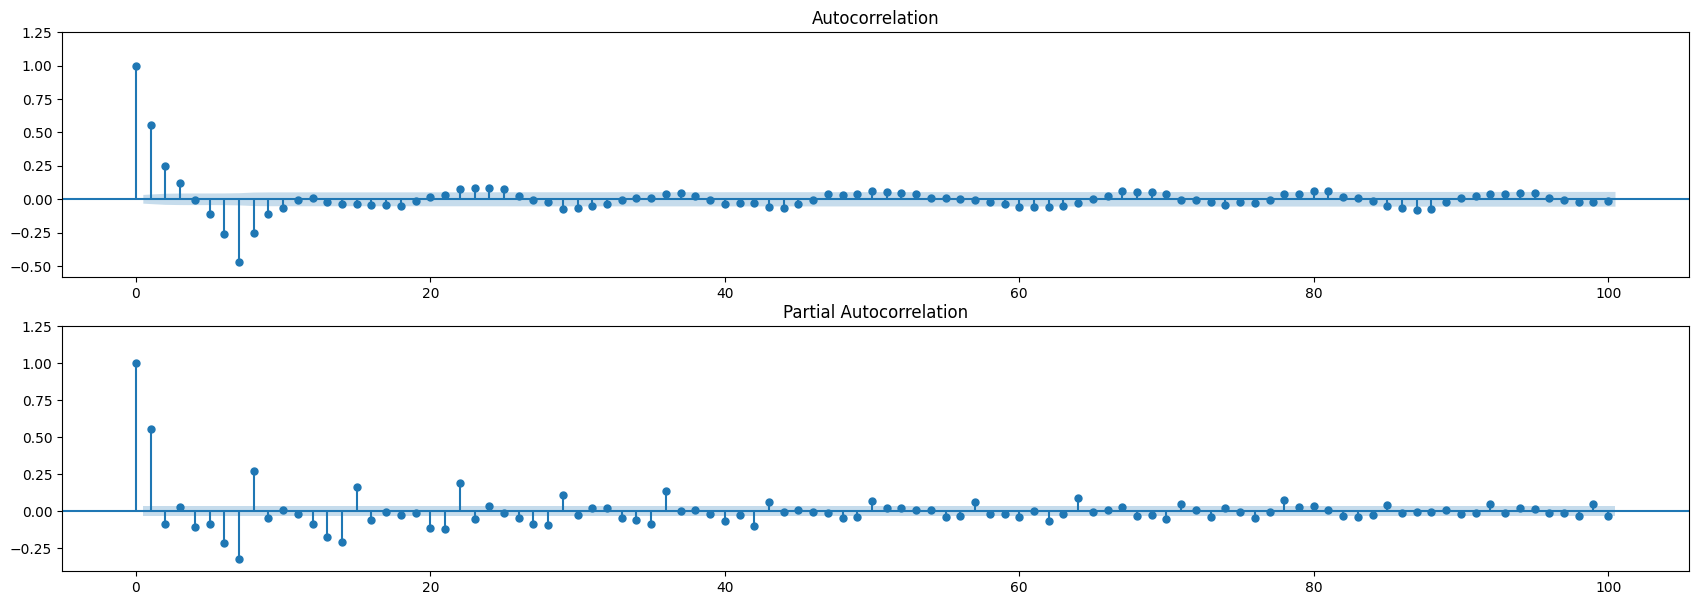

-----STA-NL00012-----
ADF Statistic: -15.410870103688822
p-value: 3.124774073459231e-28
maximal Lag: 29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.0037303159251002357
p-value: 0.1
maximal Lag: 2
Critical Values:
Non-stationary


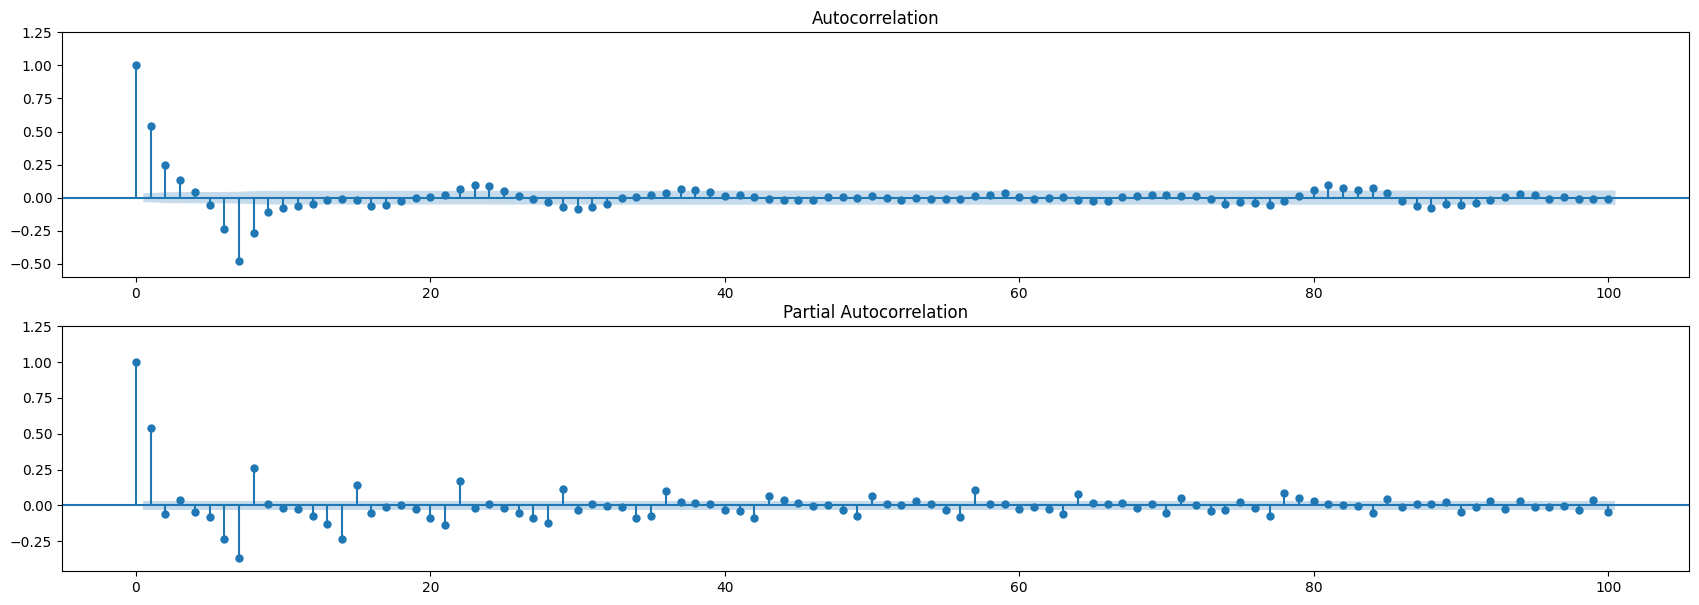

In [28]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k], [('W', 1)], lags=100)

In [29]:
import datetime

station0 = list(dfs.keys())[1]
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmax()

,AQI
2013,2013-10-16 00:00:00+01:00
2014,2014-01-21 00:00:00+01:00
2015,2015-01-19 00:00:00+01:00
2016,2016-12-06 00:00:00+01:00
2017,2017-01-24 00:00:00+01:00
2018,2018-12-27 00:00:00+01:00
2019,2019-02-26 00:00:00+01:00
2020,2020-02-13 00:00:00+01:00
2021,2021-11-04 00:00:00+01:00
2022,2022-01-10 00:00:00+01:00


In [30]:
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmin()

,AQI
2013,2013-06-08 00:00:00+01:00
2014,2014-04-15 00:00:00+01:00
2015,2015-09-06 00:00:00+01:00
2016,2016-07-14 00:00:00+01:00
2017,2017-05-01 00:00:00+01:00
2018,2018-05-17 00:00:00+01:00
2019,2019-01-02 00:00:00+01:00
2020,2020-06-24 00:00:00+01:00
2021,2021-01-02 00:00:00+01:00
2022,2022-02-04 00:00:00+01:00
